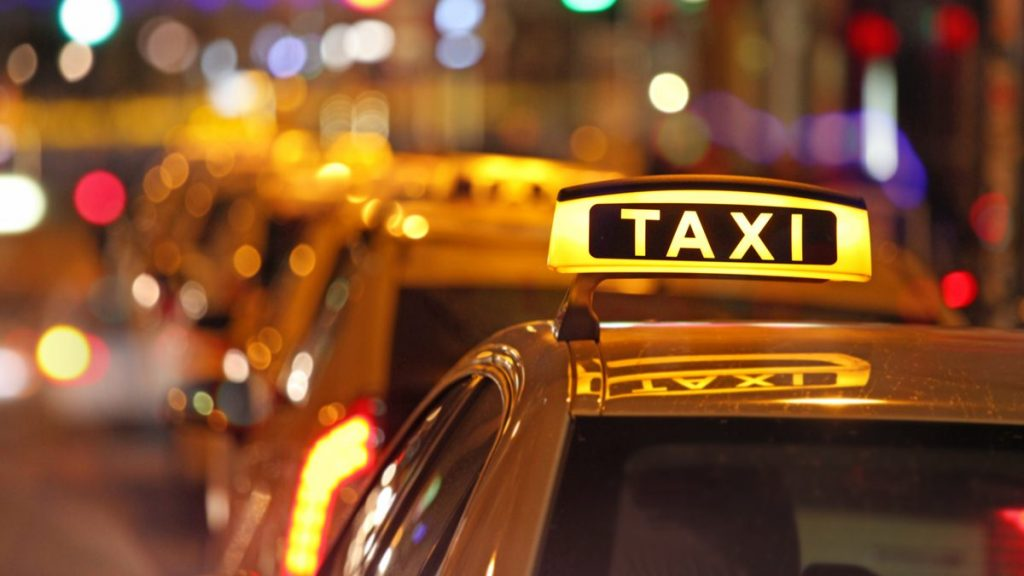

## import libararies

In [113]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("E:\Epsilon_ai\Final_Project\Taxi Datset.csv")

E:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (0,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,01/01/2020 12:35:39 AM,01/01/2020 12:43:04 AM,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,01/01/2020 12:47:41 AM,01/01/2020 12:53:52 AM,1.0,0.6,1.0,N,238.0,238.0,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,01/01/2020 12:55:23 AM,01/01/2020 01:00:14 AM,1.0,0.8,1.0,N,238.0,151.0,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,01/01/2020 12:01:58 AM,01/01/2020 12:04:16 AM,1.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
df.describe().round(2)

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,11825214.00,11916662.00,11825214.00,11916662.00,11916662.00,11825214.00,11916662.00,11916662.00,11916662.00,11916662.00,11916662.00,11916662.00,11916662.00,11916662.00
mean,1.51,2.88,1.06,164.73,162.71,1.27,12.64,1.10,0.49,2.21,0.34,0.30,18.61,2.29
std,1.15,62.01,0.80,65.49,69.79,0.47,11.93,1.26,0.07,2.72,1.73,0.03,14.55,0.72
min,0.00,-30.62,1.00,1.00,1.00,1.00,-1238.00,-27.00,-0.50,-93.00,-38.23,-0.30,-1242.30,-2.50
25%,1.00,0.96,1.00,132.00,113.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,11.16,2.50
50%,1.00,1.60,1.00,162.00,162.00,1.00,9.00,0.50,0.50,1.96,0.00,0.30,14.30,2.50
75%,2.00,2.90,1.00,234.00,234.00,2.00,14.00,2.50,0.50,2.86,0.00,0.30,19.80,2.50
max,9.00,210240.07,99.00,265.00,265.00,5.00,4265.00,113.01,39.51,1100.00,925.50,0.30,4268.30,2.75


In [5]:
df.columns = df.columns.str.lower()
df.shape

(11916667, 18)

## Handeling missing values and duplicates

In [6]:
df.isna().mean().round(5) *100

vendorid                 0.767
tpep_pickup_datetime     0.000
tpep_dropoff_datetime    0.000
passenger_count          0.767
trip_distance            0.000
ratecodeid               0.767
store_and_fwd_flag       0.767
pulocationid             0.000
dolocationid             0.000
payment_type             0.767
fare_amount              0.000
extra                    0.000
mta_tax                  0.000
tip_amount               0.000
tolls_amount             0.000
improvement_surcharge    0.000
total_amount             0.000
congestion_surcharge     0.000
dtype: float64

In [7]:
df.duplicated().sum()

12949

In [8]:
df = df.drop_duplicates()

In [9]:
df.dropna(inplace = True)
df.isna().mean().round(5) *100

vendorid                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
ratecodeid               0.0
store_and_fwd_flag       0.0
pulocationid             0.0
dolocationid             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
dtype: float64

## Numerical Features

In [10]:
df.describe().round(2)

,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,11825214.00,11825214.00,11825214.00,11825214.00,11825214.00,11825214.00,11825214.00,11825214.00,11825214.00,11825214.00,11825214.00,11825214.00,11825214.00,11825214.00
mean,1.51,2.82,1.06,164.96,162.95,1.27,12.48,1.10,0.49,2.22,0.33,0.30,18.47,2.30
std,1.15,3.71,0.80,65.37,69.70,0.47,11.77,1.25,0.07,2.72,1.71,0.03,14.44,0.70
min,0.00,-22.18,1.00,1.00,1.00,1.00,-1238.00,-27.00,-0.50,-93.00,-38.23,-0.30,-1242.30,-2.50
25%,1.00,0.96,1.00,132.00,113.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,11.16,2.50
50%,1.00,1.60,1.00,162.00,162.00,1.00,9.00,0.50,0.50,1.96,0.00,0.30,14.30,2.50
75%,2.00,2.88,1.00,234.00,234.00,2.00,13.50,2.50,0.50,2.94,0.00,0.30,19.75,2.50
max,9.00,369.94,99.00,265.00,265.00,5.00,4265.00,113.01,39.51,1100.00,925.50,0.30,4268.30,2.75


In [11]:
df.describe(include = "O").T

,count,unique,top,freq
vendorid,11825214.0,4.0,2.0,7909977.0
tpep_pickup_datetime,11825214,3924728,02/06/2020 09:17:56 PM,17
tpep_dropoff_datetime,11825214,3931169,01/12/2020 12:00:00 AM,67
store_and_fwd_flag,11825214,2,N,11701090


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11825214 entries, 0 to 11916661
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   vendorid               object 
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   ratecodeid             float64
 6   store_and_fwd_flag     object 
 7   pulocationid           float64
 8   dolocationid           float64
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(14), object(4)
memory usage: 1.7+ GB


In [13]:
df.head(1)

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,01/01/2020 12:28:15 AM,01/01/2020 12:33:03 AM,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5


### vendorid

In [14]:
df.vendorid.unique()

array([1.0, 2.0, '2', '1'], dtype=object)

In [15]:
df["vendorid"] = df["vendorid"].astype("int64")

In [16]:
df.vendorid.unique()

array([1, 2], dtype=int64)

In [17]:
drop_data = df[
            (df["passenger_count"] == 0) |
            (df["trip_distance"] == 0) |
            (df["fare_amount"] <=0 ) |
            (df["extra"] <=0 ) |
            (df["mta_tax"] <=0 ) |
            (df["total_amount"] <=0 )
             ].index
print("Percentage of false data = ",(drop_data.shape[0]/df.shape[0]*100 ), "%")

Percentage of false data =  40.087249160987696 %


In [18]:
df.drop(drop_data, inplace = True)

### passenger_count

In [19]:
df.passenger_count.unique()

array([1., 2., 3., 6., 4., 5., 8., 9., 7.])

In [20]:
df.dropna(inplace = True)
df.isna().sum()

vendorid                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
store_and_fwd_flag       0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

In [21]:
df.shape

(7084811, 18)

In [22]:
df["passenger_count"].value_counts(normalize =True).round(4) *100

1.0    74.04
2.0    15.72
3.0     3.91
5.0     2.83
4.0     1.98
6.0     1.52
7.0     0.00
9.0     0.00
8.0     0.00
Name: passenger_count, dtype: float64

In [23]:
drop_passenger = [7,8,9]

In [24]:
for i in drop_passenger  :
    df.drop(df[df["passenger_count"] == i].index , inplace = True)

### Tolls_amount

In [25]:
df["tolls_amount"].describe().round(3) *100

count    708480200.0
mean            23.8
std            138.7
min              0.0
25%              0.0
50%              0.0
75%              0.0
max          91175.0
Name: tolls_amount, dtype: float64

In [26]:
df["tolls_amount"].value_counts(normalize =True).round(4) *100

0.00     96.18
6.12      3.65
2.80      0.06
12.24     0.03
11.75     0.01
         ...  
15.59     0.00
29.40     0.00
20.87     0.00
41.37     0.00
50.90     0.00
Name: tolls_amount, Length: 514, dtype: float64

In [27]:
df.drop(df[(df["tolls_amount"] !=  0 ) & (df["tolls_amount"] != 6.12)].index , inplace = True)

In [28]:
df["tolls_amount"].value_counts(normalize =True).round(4) *100

0.00    96.34
6.12     3.66
Name: tolls_amount, dtype: float64

In [29]:
df["tolls_amount"].describe().round(2)

count    7072548.00
mean           0.22
std            1.15
min            0.00
25%            0.00
50%            0.00
75%            0.00
max            6.12
Name: tolls_amount, dtype: float64

In [30]:
df["tolls_amount"].value_counts(normalize =True).round(4) *100

0.00    96.34
6.12     3.66
Name: tolls_amount, dtype: float64

In [31]:
# tolls_amount has no big impact on data
df['tolls_amount'].quantile(0.95)

0.0

### ratecodeid

In [32]:
df["ratecodeid"].value_counts(normalize = True).round(4) *100

1.0     98.47
2.0      1.47
4.0      0.06
99.0     0.00
5.0      0.00
3.0      0.00
Name: ratecodeid, dtype: float64

In [33]:
df.drop(df[df["ratecodeid"] == 99].index , inplace = True)

In [34]:
df["ratecodeid"].value_counts(normalize = True).round(4) *100

1.0    98.47
2.0     1.47
4.0     0.06
5.0     0.00
3.0     0.00
Name: ratecodeid, dtype: float64

In [35]:
df.drop(df[(df["ratecodeid"] != 1) & (df["ratecodeid"] != 2)].index , inplace = True)

In [36]:
df.ratecodeid.value_counts(normalize = True)

1.0    0.985336
2.0    0.014664
Name: ratecodeid, dtype: float64

### Trip_distance

In [37]:
df['trip_distance'].describe().round(2)


count    7067972.00
mean           2.69
std            3.21
min            0.01
25%            1.00
50%            1.62
75%            2.90
max          164.20
Name: trip_distance, dtype: float64

In [38]:
df[df.trip_distance <=0].index

Int64Index([], dtype='int64')

In [39]:
df["trip_distance"].value_counts(normalize = True).round(4) *100

0.90     2.59
0.80     2.58
1.00     2.55
0.70     2.46
1.10     2.45
         ... 
31.79    0.00
30.28    0.00
33.98    0.00
34.97    0.00
65.32    0.00
Name: trip_distance, Length: 3374, dtype: float64

In [40]:
df.groupby("trip_distance").fare_amount.mean()

trip_distance
0.01        9.966151
0.02        9.467600
0.03        9.076594
0.04        7.993227
0.05        6.882231
             ...    
94.10     286.500000
109.45     52.000000
111.90    297.000000
151.20    389.000000
164.20    476.500000
Name: fare_amount, Length: 3374, dtype: float64

### Congestion_surcharge

In [41]:
df['congestion_surcharge'].value_counts()

2.50    6737539
0.00     330293
2.75        123
0.75         13
0.50          4
Name: congestion_surcharge, dtype: int64

In [42]:
df.groupby("congestion_surcharge").fare_amount.mean()

congestion_surcharge
0.00    19.681888
0.50    19.375000
0.75    10.653846
2.50    11.311784
2.75    11.837398
Name: fare_amount, dtype: float64

In [43]:
df[df.congestion_surcharge == 0.50]

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1431906,1,01/08/2020 10:21:43 PM,01/08/2020 10:37:29 PM,1.0,3.9,1.0,N,249.0,145.0,1.0,14.5,0.5,3.3,6.10,6.12,0.0,30.52,0.5
1682585,1,01/10/2020 03:08:45 AM,01/10/2020 03:19:37 AM,1.0,1.8,1.0,N,48.0,170.0,1.0,9.0,0.5,3.3,2.00,0.00,0.0,14.80,0.5
4859963,1,01/25/2020 02:26:23 AM,01/25/2020 03:05:04 AM,1.0,10.0,1.0,N,148.0,14.0,1.0,36.0,0.5,0.5,10.00,0.00,0.0,47.00,0.5
6113485,1,01/30/2020 11:10:08 PM,01/30/2020 11:31:10 PM,1.0,4.4,1.0,N,79.0,106.0,1.0,18.0,0.5,0.5,4.35,0.00,0.0,23.35,0.5


In [44]:
df.drop(df[df.congestion_surcharge == 0.5].index , inplace = True)

### Payment type

In [45]:
df.payment_type.value_counts(normalize = True)

1.0    0.761569
2.0    0.232140
3.0    0.004568
4.0    0.001723
Name: payment_type, dtype: float64

In [101]:
payment_mapping = {
    1: 'cash',
    2: 'mobile',
    3: 'credit card',
    4: 'prcard'
}
df['payment_type'] = df['payment_type'].map(payment_mapping)

In [102]:
df['payment_type'].value_counts(normalize = True)

cash           0.762427
mobile         0.231590
credit card    0.004365
prcard         0.001618
Name: payment_type, dtype: float64

### Extra

In [48]:
df['extra'].value_counts(normalize = True).round(3)

0.50      0.318
2.50      0.263
1.00      0.196
3.00      0.126
3.50      0.090
4.50      0.005
7.00      0.002
0.80      0.000
1.30      0.000
1.80      0.000
2.00      0.000
2.80      0.000
5.00      0.000
0.02      0.000
2.95      0.000
9.50      0.000
18.35     0.000
0.52      0.000
90.06     0.000
5.30      0.000
87.56     0.000
1.02      0.000
2.05      0.000
42.50     0.000
5.50      0.000
12.00     0.000
2.15      0.000
1.75      0.000
52.50     0.000
13.50     0.000
113.01    0.000
33.75     0.000
10.50     0.000
Name: extra, dtype: float64

In [49]:
df.extra.value_counts(normalize = True , ascending = True).round(3).head(15)

10.50     0.0
2.15      0.0
5.50      0.0
12.00     0.0
52.50     0.0
33.75     0.0
42.50     0.0
1.75      0.0
13.50     0.0
113.01    0.0
5.30      0.0
18.35     0.0
90.06     0.0
0.52      0.0
2.05      0.0
Name: extra, dtype: float64

In [50]:
values_to_drop = df.extra.value_counts(normalize = True , ascending = True).head(15).keys().tolist()

In [51]:
for i in values_to_drop :
    df.drop(df[df.extra == i].index , inplace = True)

In [52]:
df['extra'].value_counts(normalize = True).round(3)

0.50     0.318
2.50     0.263
1.00     0.196
3.00     0.126
3.50     0.090
4.50     0.005
7.00     0.002
0.80     0.000
1.30     0.000
1.80     0.000
2.00     0.000
2.80     0.000
5.00     0.000
9.50     0.000
2.95     0.000
0.02     0.000
1.02     0.000
87.56    0.000
Name: extra, dtype: float64

### Mta_X

In [53]:
df["mta_tax"].value_counts(normalize = True).round(4)

0.50     1.0
0.35     0.0
1.30     0.0
2.74     0.0
39.51    0.0
Name: mta_tax, dtype: float64

In [54]:
df["mta_tax"] = 0.50

### Pick_up & Drop_off date

In [55]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')

df['pickup_date'] = df['tpep_pickup_datetime'].dt.date

df['pickup_time'] = df['tpep_pickup_datetime'].dt.strftime('%H:%M:%S')

In [56]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

df['dropoff_date'] = df['tpep_dropoff_datetime'].dt.date

df['dropoff_time'] = df['tpep_dropoff_datetime'].dt.strftime('%H:%M:%S')

In [57]:
# converting the object dtype to date and time
df['pickup_date'] = pd.to_datetime(df['pickup_date'])
df['pickup_time'] = pd.to_timedelta(df['pickup_time'])

df['dropoff_date'] = pd.to_datetime(df['dropoff_date'])
df['dropoff_time'] = pd.to_timedelta(df['dropoff_time'])

In [58]:
df.drop(columns = ['tpep_pickup_datetime','tpep_dropoff_datetime'] ,axis = 1, inplace = True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7067948 entries, 0 to 11916661
Data columns (total 21 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   vendorid               int64          
 1   passenger_count        float64        
 2   trip_distance          float64        
 3   ratecodeid             float64        
 4   store_and_fwd_flag     object         
 5   pulocationid           float64        
 6   dolocationid           float64        
 7   payment_type           float64        
 8   fare_amount            float64        
 9   extra                  float64        
 10  mta_tax                float64        
 11  tip_amount             float64        
 12  tolls_amount           float64        
 13  improvement_surcharge  float64        
 14  total_amount           float64        
 15  congestion_surcharge   float64        
 16  payment_method         object         
 17  pickup_date            datetime64[ns] 
 18  p

In [60]:
def time_in_seconds (t):
    return t.total_seconds()

df["pickup_time_second"] = df["pickup_time"].apply(time_in_seconds)
df["dropoff_time_second"] = df["dropoff_time"].apply(time_in_seconds)

In [61]:
df.head(2)

,vendorid,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,...,improvement_surcharge,total_amount,congestion_surcharge,payment_method,pickup_date,pickup_time,dropoff_date,dropoff_time,pickup_time_second,dropoff_time_second
0,1,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,...,0.3,11.27,2.5,cash,2020-01-01,0 days 00:28:15,2020-01-01,0 days 00:33:03,1695.0,1983.0
1,1,1.0,1.2,1.0,N,239.0,238.0,1.0,7.0,3.0,...,0.3,12.30,2.5,cash,2020-01-01,0 days 00:35:39,2020-01-01,0 days 00:43:04,2139.0,2584.0


In [62]:
df["duration_of_the_trip"] = df["dropoff_time_second"] -df["pickup_time_second"]
df["duration_of_the_trip"] = df["duration_of_the_trip"] /60
df.drop(columns = ['pickup_time_second','dropoff_time_second'] ,axis = 1, inplace = True)

In [63]:
df.pickup_date.dt.year.value_counts()

2020    7067801
2019        119
2009         14
2008         11
2021          3
Name: pickup_date, dtype: int64

In [64]:
df.drop(df[df.pickup_date.dt.year != 2020].index, inplace =True)

### Tip_amount

E:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
E:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: P

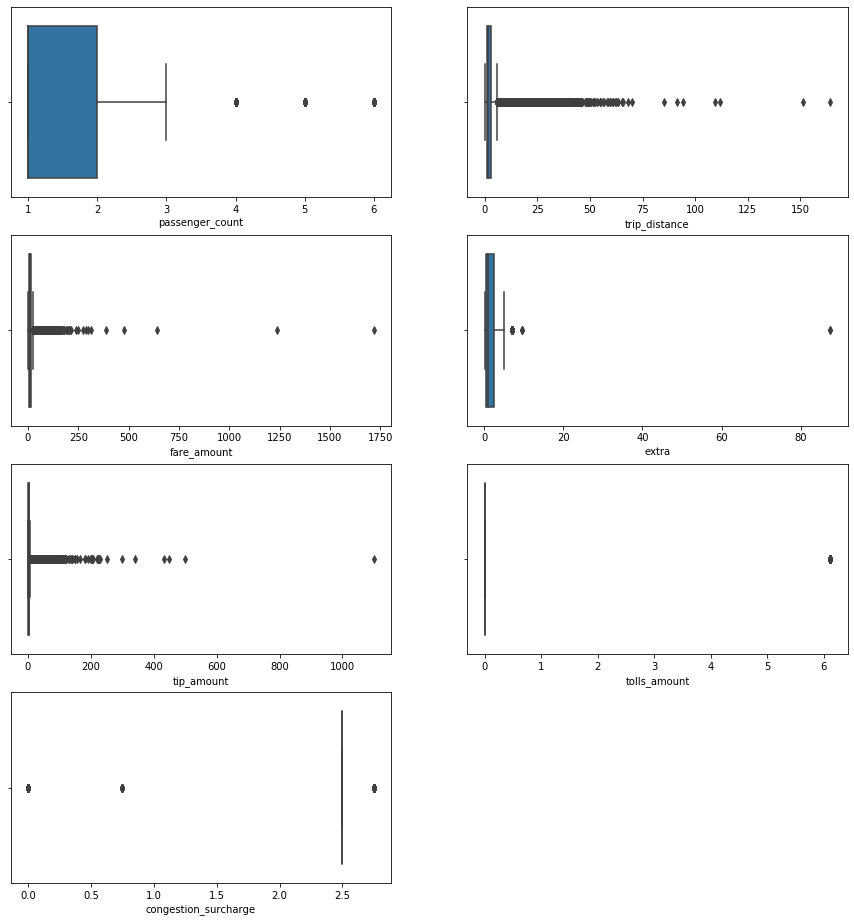

In [65]:
num_cols = ['passenger_count','trip_distance','fare_amount','extra','tip_amount','tolls_amount','congestion_surcharge']
plt.figure(figsize=(15,75))
for i in range(len(num_cols)):
    plt.subplot(18,2,i+1)
    sns.boxplot(df[num_cols[i]])


plt.show()


In [66]:
df.tip_amount.value_counts(ascending = False).head(100).round(3)

0.00    1821076
1.00     428142
2.00     295475
1.50     105121
2.06      88871
         ...   
6.00      10243
0.70      10209
4.66      10137
2.32      10119
3.80      10088
Name: tip_amount, Length: 100, dtype: int64

In [67]:
df.trip_distance.nlargest(10)

9323712     164.20
10014899    151.20
9986506     111.90
11364286    109.45
2616555      94.10
1578475      91.41
5795103      85.20
11503230     69.80
9172373      68.30
3747645      65.70
Name: trip_distance, dtype: float64

In [68]:
df.trip_distance.nsmallest(200)

1015       0.01
4815       0.01
6130       0.01
7362       0.01
13516      0.01
           ... 
1450967    0.01
1566547    0.01
1568332    0.01
1568850    0.01
1568900    0.01
Name: trip_distance, Length: 200, dtype: float64

In [69]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [70]:
numerical_cols = ["tolls_amount", "trip_distance"]
for col in numerical_cols :
    df = remove_outliers_iqr(df, col)

E:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


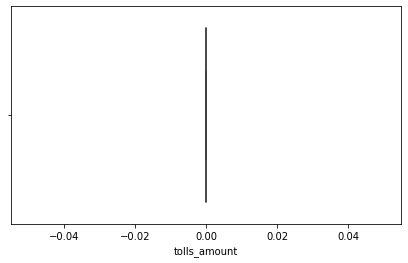

In [71]:
plt.figure(figsize=(7,4))
sns.boxplot(df["tolls_amount"])
plt.show()


In [72]:
df.tolls_amount.value_counts(normalize = True)

0.0    1.0
Name: tolls_amount, dtype: float64

E:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


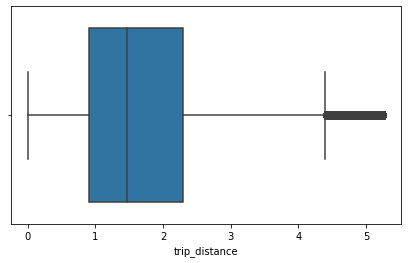

In [73]:
plt.figure(figsize=(7,4))
sns.boxplot(df["trip_distance"])
plt.show()


###  pulocationid && dolocationid

Feature Engineering

In [74]:
df.head(1)

,vendorid,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,payment_method,pickup_date,pickup_time,dropoff_date,dropoff_time,duration_of_the_trip
0,1,1.0,1.2,1.0,N,238.0,239.0,1.0,6.0,3.0,...,0.0,0.3,11.27,2.5,cash,2020-01-01,0 days 00:28:15,2020-01-01,0 days 00:33:03,4.8


In [75]:
taxis = sns.load_dataset('taxis')

In [76]:
taxis["pickup_zone"].value_counts().count()

194

In [77]:
df.dolocationid.value_counts(normalize = True , ascending = True).count()

253

In [78]:
df.dolocationid.value_counts(normalize = True , ascending = True).round(3).head(10)

187.0    0.0
115.0    0.0
206.0    0.0
221.0    0.0
2.0      0.0
172.0    0.0
96.0     0.0
46.0     0.0
44.0     0.0
201.0    0.0
Name: dolocationid, dtype: float64

In [79]:
drop_values = df['dolocationid'].value_counts(normalize = True , ascending = True).head(67).keys().tolist()

In [80]:
261-194

67

In [81]:
for i in drop_values :
    df.drop(df[df["dolocationid"] == i ].index ,inplace = True)

In [82]:
df.pulocationid.value_counts(normalize = True , ascending = True).count()

235

In [83]:
252-194

58

In [84]:
drop_values_pulocationid = df['pulocationid'].value_counts(normalize = True , ascending = True).head(58).keys().tolist()

In [85]:
for i in drop_values_pulocationid :
    df.drop(df[df["pulocationid"] == i ].index ,inplace = True)

In [86]:
df.pulocationid.value_counts(normalize = True , ascending = True).keys()

Float64Index([ 63.0, 242.0,  21.0, 121.0, 102.0, 194.0,  22.0, 248.0,  77.0,
              182.0,
              ...
               79.0, 142.0,  48.0, 234.0, 186.0, 236.0, 162.0, 230.0, 237.0,
              161.0],
             dtype='float64', length=177)

In [87]:
unique_floats_dolocationid = df.dolocationid.value_counts(normalize = True , ascending = True).keys().tolist()

In [88]:
unique_strings = taxis["pickup_zone"].value_counts(normalize = True , ascending = True).keys().tolist()

In [89]:
float_to_string_mapping_dolocationid = dict(zip(unique_floats_dolocationid, unique_strings))

In [90]:
df['drop_of_location'] = df['dolocationid'].map(float_to_string_mapping_dolocationid)

In [91]:
unique_floats_pulocationid = df.pulocationid .value_counts(normalize = True , ascending = True).keys().tolist()

In [92]:
float_to_string_mapping_pulocationid = dict(zip(unique_floats_pulocationid, unique_strings))

In [93]:
df['pick_up_location'] = df['pulocationid'].map(float_to_string_mapping_pulocationid)

## Categorical outliers

### store_and_fwd_flag

In [94]:
df.groupby("store_and_fwd_flag")["fare_amount"].mean()

store_and_fwd_flag
N    9.132189
Y    9.193201
Name: fare_amount, dtype: float64

In [95]:
df["store_and_fwd_flag"].value_counts(normalize = True).round(4) *100

N    98.52
Y     1.48
Name: store_and_fwd_flag, dtype: float64

In [96]:
# drop because it doesnot affect the fair amount
df.drop("store_and_fwd_flag" ,axis = 1, inplace = True)

## Load to csv file

In [106]:
df.head(5)

,vendorid,passenger_count,trip_distance,ratecodeid,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,...,improvement_surcharge,total_amount,congestion_surcharge,pickup_date,pickup_time,dropoff_date,dropoff_time,duration_of_the_trip,drop_of_location,pick_up_location
0,1,1.0,1.20,1.0,238.0,239.0,cash,6.0,3.0,0.5,...,0.3,11.27,2.5,2020-01-01,0 days 00:28:15,2020-01-01,0 days 00:33:03,4.800000,East Chelsea,Astoria
1,1,1.0,1.20,1.0,239.0,238.0,cash,7.0,3.0,0.5,...,0.3,12.30,2.5,2020-01-01,0 days 00:35:39,2020-01-01,0 days 00:43:04,7.416667,Upper West Side North,West Chelsea/Hudson Yards
2,1,1.0,0.60,1.0,238.0,238.0,cash,6.0,3.0,0.5,...,0.3,10.80,2.5,2020-01-01,0 days 00:47:41,2020-01-01,0 days 00:53:52,6.183333,Upper West Side North,Astoria
3,1,1.0,0.80,1.0,238.0,151.0,cash,5.5,0.5,0.5,...,0.3,8.16,0.0,2020-01-01,0 days 00:55:23,2020-01-01,0 days 01:00:14,4.850000,Battery Park City,Astoria
5,2,1.0,0.03,1.0,7.0,193.0,mobile,2.5,0.5,0.5,...,0.3,3.80,0.0,2020-01-01,0 days 00:09:44,2020-01-01,0 days 00:10:37,0.883333,East Flatbush/Remsen Village,Old Astoria


In [109]:
df.shape

(6242246, 22)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6242246 entries, 0 to 11916660
Data columns (total 22 columns):
 #   Column                 Dtype          
---  ------                 -----          
 0   vendorid               int64          
 1   passenger_count        float64        
 2   trip_distance          float64        
 3   ratecodeid             float64        
 4   pulocationid           float64        
 5   dolocationid           float64        
 6   payment_type           object         
 7   fare_amount            float64        
 8   extra                  float64        
 9   mta_tax                float64        
 10  tip_amount             float64        
 11  tolls_amount           float64        
 12  improvement_surcharge  float64        
 13  total_amount           float64        
 14  congestion_surcharge   float64        
 15  pickup_date            datetime64[ns] 
 16  pickup_time            timedelta64[ns]
 17  dropoff_date           datetime64[ns] 
 18  d

In [111]:
df.to_csv("_Cleaned_Taxi_Datset.csv",index =False)